# Selenium to Extract from Crypto Market Cap

## Import the libraris that will have in use:

this imports are not all the libraries that we will be using but are the required ones to use selenium for the extraction that we are looking for.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import numpy as np
import re as re
import time
import pandas as pd
import os
from pymongo import MongoClient
from dotenv import load_dotenv
from selenium.webdriver.chrome.options import Options

## Setting the enviroment to use selenium and import info

for the project ill be extracting the list of all crypto currencies from the we page listed in the URL

In [2]:
url = "https://coinmarketcap.com/?page=2"

In [3]:
# we need web page number of page to be added in the url by using the parameter for the url "/?page=3"

The following code will allow to set up the browser so that selenium can run and load a page:

In [4]:
options = Options()
options.add_argument('--window-size=2560,1440') # will asigne size of browser screen
options.add_argument('--disable-gpu') # use the GPU resources 
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                          options = options) # this will launch the browser. 

In [5]:
driver.get(url)
time.sleep(4)

the following code slowly scrolls through a web page allowing for the content to load and ensure the extraction of all the available information by page:

In [6]:
current_scroll_position, new_height= 0, 1
while current_scroll_position <= new_height:
    current_scroll_position += 8
    driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
    new_height = driver.execute_script("return document.body.scrollHeight")
    
html = driver.execute_script("return document.body.outerHTML;")

In [102]:
#html

## ELT

Now that we have a HTML file we can use this information and starget specific information so that we can use it to make a data frame with all the cryptos in the market.

In [8]:
soup = BeautifulSoup(html,"html.parser")

###  Extracting the name of the crypto

In [16]:
feed = soup.find_all("p",{"class":"sc-1eb5slv-0 iworPT"})

In [17]:
len(feed)

106

In [18]:
feed[0].text

'PancakeSwap'

In [19]:
cryplist = []
for i in range (6,len(feed)):
        temp = feed[i].text
        cryplist.append(temp)

In [20]:
print(cryplist)

['Theta Fuel', 'Oasis Network', 'Ravencoin', 'Kadena', 'Gemini Dollar', 'IoTeX', 'Kyber Network Crystal v2', 'Amp', 'Livepeer', 'BORA', 'Balancer', 'OMG Network', 'Optimism', 'TerraClassicUSD', 'Celsius', '0x', 'Symbol', 'Harmony', 'Ethereum Name Service', 'ICON', 'JUST', 'Golem', 'Reserve Rights', 'IOST', 'Audius', 'Hive', 'Storj', 'Flux', 'Ontology', 'WAX', 'Serum', 'Siacoin', 'Horizen', 'Moonbeam', 'Secret', 'Immutable X', 'ABBC Coin', 'UMA', 'Braintrust', 'SXP', 'Chia', 'MXC', 'Bitcoin Standard Hashrate Token', 'SKALE Network', 'WOO Network', 'Polymath', 'Smooth Love Potion', 'SwissBorg', 'Casper', 'DigiByte', 'Dogelon Mars', 'DAO Maker', 'APENFT', 'PlayDapp', 'CEEK VR', 'Civic', 'SushiSwap', 'Spell Token', 'Voyager Token', 'Pundi X (New)', 'Keep Network', 'Lisk', 'Nervos Network', 'Render Token', 'MediBloc', 'Celer Network', 'Ellipsis', 'Energy Web Token', 'Ren', 'Nano', 'WINkLink', 'Injective', 'Conflux', 'NuCypher', 'Request', 'Ontology Gas', 'ConstitutionDAO', 'Orbs', 'dYdX', '

In [21]:
len(cryplist)

100

###  Extracting the Supply for every Crypto

In [22]:
supply= soup.find_all("p",{"class":"sc-1eb5slv-0 kZlTnE"})

In [23]:
len(supply)

100

In [24]:
supply[0].text

'5,301,214,400 TFUEL'

In [25]:
suplist=[]
for e in range (0,len(supply)):
    temp = supply[e].text
    suplist.append(temp)

In [27]:
print(suplist)

['5,301,214,400 TFUEL', '5,027,383,223 ROSE', '10,473,290,000 RVN', '197,986,762 KDA', '318,240,045 GUSD', '9,540,779,324 IOTX', '177,809,350 KNC', '42,227,702,186 AMP', '24,487,538 LPT', '927,500,000 BORA', '43,115,645 BAL', '140,245,398 OMG', '234,748,364 OP', '9,815,492,200 USTC', '238,863,520 CEL', '847,496,055 ZRX', '5,582,460,005 XYM', '12,439,633,430 ONE', '20,244,862 ENS', '919,483,096 ICX', '8,902,080,000 JST', '1,000,000,000 GLM', '42,302,323,974 RSR', '18,588,745,668 IOST', '818,441,374 AUDIO', '434,638,910 HIVE', '409,514,778 STORJ', '258,142,426 FLUX', '875,249,524 ONT', '2,132,391,668 WAXP', '263,244,669 SRM', '51,784,462,992 SC', '12,753,094 ZEN', '360,870,145 GLMR', '163,295,557 SCRT', '235,284,001 IMX', '1,009,277,022 ABBC', '68,715,405 UMA', '91,803,328 BTRST', '495,442,521 SXP', '4,908,256 XCH', '2,642,132,372 MXC', '12,201,404 BTCST', '3,676,102,671 SKL', '1,145,741,585 WOO', '924,998,413 POLY', '43,322,775,281 SLP', '1,000,000,000 CHSB', '5,738,068,663 CSPR', '15,5

In [26]:
len(suplist)

100

###  Extracting the TAG for every Crypto

In [28]:
coin =soup.find_all("p",{"class":"sc-1eb5slv-0 gGIpIK coin-item-symbol"})

In [29]:
len(coin)

106

In [30]:
coin[1].text

''

In [31]:
coinlist = []
for i in range (6,len(coin)):
        temp = coin[i].text
        coinlist.append(temp)

In [32]:
print(coinlist)

['TFUEL', 'ROSE', 'RVN', 'KDA', 'GUSD', 'IOTX', 'KNC', 'AMP', 'LPT', 'BORA', 'BAL', 'OMG', 'OP', 'USTC', 'CEL', 'ZRX', 'XYM', 'ONE', 'ENS', 'ICX', 'JST', 'GLM', 'RSR', 'IOST', 'AUDIO', 'HIVE', 'STORJ', 'FLUX', 'ONT', 'WAXP', 'SRM', 'SC', 'ZEN', 'GLMR', 'SCRT', 'IMX', 'ABBC', 'UMA', 'BTRST', 'SXP', 'XCH', 'MXC', 'BTCST', 'SKL', 'WOO', 'POLY', 'SLP', 'CHSB', 'CSPR', 'DGB', 'ELON', 'DAO', 'NFT', 'PLA', 'CEEK', 'CVC', 'SUSHI', 'SPELL', 'VGX', 'PUNDIX', 'KEEP', 'LSK', 'CKB', 'RNDR', 'MED', 'CELR', 'EPS', 'EWT', 'REN', 'XNO', 'WIN', 'INJ', 'CFX', 'NU', 'REQ', 'ONG', 'PEOPLE', 'ORBS', 'DYDX', 'FX', 'RLY', 'UOS', 'ARDR', 'TRIBE', 'NMR', 'POWR', 'MX', 'RLC', 'SNT', 'COTI', 'VLX', 'XYO', 'CHR', 'ACA', 'PROM', 'API3', 'FXS', 'TEL', 'DENT', 'OCEAN']


In [33]:
len(coinlist)

100

###  Extracting the Market Capital for every Crypto

In [34]:
mcap =soup.find_all("p",{"class":"sc-1eb5slv-0 hykWbK"})


In [35]:
len(mcap)

102

In [36]:
mcap[1].text

'$339.31M$339,313,697'

In [37]:
mcaplist = []
for i in range (1,len(mcap)-1):
        temp = mcap[i].text
        mcaplist.append(temp)

In [39]:
print(mcaplist)

['$339.31M$339,313,697', '$331.51M$331,513,453', '$325.95M$325,950,362', '$319.13M$319,134,201', '$313.02M$313,021,076', '$311.78M$311,782,064', '$307.56M$307,562,994', '$287.57M$287,566,834', '$278.38M$278,384,895', '$275.66M$275,657,893', '$264.43M$264,425,150', '$263.45M$263,448,603', '$261.74M$261,741,260', '$261.08M$261,075,885', '$259.98M$259,982,727', '$258.41M$258,410,387', '$257.24M$257,240,814', '$256.94M$256,937,766', '$256.82M$256,823,876', '$256.49M$256,492,797', '$253.19M$253,186,451', '$249.92M$249,920,345', '$247.25M$247,250,572', '$245.59M$245,591,519', '$244.80M$244,798,599', '$240.13M$240,131,747', '$236.95M$236,945,697', '$232.79M$232,793,683', '$218.46M$218,464,529', '$216.16M$216,158,753', '$213.47M$213,468,671', '$209.78M$209,780,378', '$207.59M$207,586,047', '$204.20M$204,202,326', '$199.01M$199,008,541', '$195.41M$195,406,815', '$194.33M$194,325,588', '$194.21M$194,208,643', '$191.76M$191,764,630', '$191.37M$191,369,860', '$187.14M$187,137,701', '$187.10M$187,1

In [38]:
len(mcaplist)

100

### Extratcting this information for every page in the URL 

The Crypto currency market cap link only displays 100 coins per page and it has 96 pages in total so need to iterate te link: 

"https://coinmarketcap.com/?page={i}"

We set up the everything in a loop so that we can do an iteration for every web link that contains the information we want to extrat in order to have a general database of all available coins.

i am only considering the first 30 pages of crypto currency market cap because after the 2600 coin the valuation of this coins 

In [112]:
# temporary storage list
cryplist = []
suplist = []
coinlist = []
mcaplist = []

# Loop for Selenium extraction:

for i in range (1,31):
    url = f"https://coinmarketcap.com/?page={i}"
    
    # Sellenium set up
    options = Options()
    options.add_argument('--headless') #prevents chrome from oppening
    options.add_argument('--window-size=2560,1440') #set the browsers window size
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                              options = options)
    driver.get(url)
    
    # time dalay for the webpage to load:
    time.sleep(3)
    current_scroll_position, new_height= 0, 1
    while current_scroll_position <= new_height:
        current_scroll_position += 8
        driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
        new_height = driver.execute_script("return document.body.scrollHeight")

    html = driver.execute_script("return document.body.outerHTML;")
    soup = BeautifulSoup(html,"html.parser")
    
    # Crypto currency name:
    crypt = soup.find_all("p",{"class":"sc-1eb5slv-0 iworPT"})
    
    for e in range (6,len(crypt)):
            temp = crypt[e].text
            cryplist.append(temp)
    
     # Crypto Circulating supply:
    supply= soup.find_all("p",{"class":"sc-1eb5slv-0 kZlTnE"})
    
    for d in range (0,len(supply)):
            temp = supply[d].text
            suplist.append(temp)
            
    # Crypto coin Tag:        
    coin =soup.find_all("p",{"class":"sc-1eb5slv-0 gGIpIK coin-item-symbol"})
        
    for f in range (6,len(coin)):
            temp = coin[f].text
            coinlist.append(temp)
            
    # Market Cap:        
    mcap =soup.find_all("p",{"class":"sc-1eb5slv-0 hykWbK"})
    
    for g in range (1,len(mcap)-1):
            temp = mcap[g].text
            mcaplist.append(temp)
            
    print("The extraction is at:",(str(round(((i/30)*100),2))+" "+"%"),end = '\r')

This snip-it of code will allow me to know the progress of the extraction using the selenium library:

In [6]:
for i in range(1,96):
    print("The extraction is at:",(str(round(((i/95)*100),2))+" "+"%"),end = '\r')

Now we check the diferent lists and check how much information is being extracted, and validate that the list are the same size so that we can zip them together:

In [113]:
len(cryplist)

3000

In [115]:
len(coinlist)

3000

### Cleaning and preparing extracted info

Now we need to clean the information that is in our mcap and suplist, we need to strip and replace some characters and convert the information into an integer to make calculations. 

In [151]:
mcaplist2 =[]
for i in range(0,len(mcaplist)):
    temp = int(mcaplist[i].split("$")[2].replace(",",""))
    mcaplist2.append(temp)

In [155]:
mcaplist2[0:5]

[386397924400, 183395206574, 67554553738, 52220337195, 45732354376]

In [167]:
suplist2 =[]
for i in range(0,len(suplist)):
    temp = int(suplist[i].split(" ")[0].replace(",",""))
    suplist2.append(temp)

In [168]:
suplist2[0:5]

[19133556, 122131426, 67549664915, 52212562312, 161337261]

### Creating a Dictionary and DF from our list. 

The information is now clean as we want it and we can use it to analize what the currency valuation is at the moement and later we can use it to analize the distribution of prices of the top 2500 currencies. first we will create a dataframe by using the list zip method and afterwards creating a dataframe using pandas.

In [169]:
all_crypto = list(zip(cryplist, coinlist,suplist2,mcaplist2))

In [170]:
df_crypto = pd.DataFrame(all_crypto, columns = ['name', 'coin','supply','mcap'])

Create a new column that will give us the coin price considering the market capital diluted in the current circulating supply.

In [176]:
df_crypto["price"] =round(df_crypto["mcap"]/df_crypto["supply"],5) 

In [203]:
df_crypto.sample(10)

,name,coin,supply,mcap,price
1595,Golos Blockchain,GLS,307291234,636666,0.00207
16,Wrapped Bitcoin,WBTC,247761,5002514687,20190.88834
873,Phoenix Global (new),PHB,37136775,6517386,0.17550
1659,Minswap,MIN,25000000,522227,0.02089
564,ZIMBOCASH,ZASH,1590616010,23816732,0.01497
1435,DragonVein,DVC,605026614,1016513,0.00168
1820,Planet Inverse,XIV,33435498,322020,0.00963
2180,Fortuna Sittard Fan Token,FOR,145000,101725,0.70155
548,Cortex,CTXC,199936563,24820749,0.12414
2270,PiplCoin,PIPL,172536809,69663,0.00040


Now we save our usefull database to do market analysis later in conjuction with the time series.

In [185]:
df_crypto.to_csv(".\\output\\df_crypto.csv")

# Extracting Info from Yahoo Finance

This library will help us get the time series of any crypto currency listed in Yahoo Finance:

In [2]:
# Import the necessary functions
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
from datetime import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Extracting the Timeserie of a Coin

as shown bellow we will be extractin the information for the proce fluctuation of a crypto currency using the Yahoo Finanace estraction library Pandas_datareader this will give us important metrics such as 

- Adjusted Closing market price
- Colising price per day
- Highest value reached per day
- Lowest value reached per day
- Opening price per day
- Volumen of transaction movements during the day


In [4]:
# the list of variables should be dynamic - the user should have a choice of how many cryptos to run it on
COINS=['NFTD-USD']

data = pdr.yahoo.daily.YahooDailyReader(symbols=COINS, start=datetime(2017, 11, 9), end=datetime(2022, 8, 27), get_actions=True)
df = data.read()
#df=df.iloc[:, df.columns.get_level_values(0)=='Adj Close']

the currency must be: "Name_of_Coin" + "-USD" this will search for the desired coin with the fiat USD valuation.

Example:

COINS=['GRID-USD']


In [5]:
df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,NFTD-USD,NFTD-USD,NFTD-USD,NFTD-USD,NFTD-USD,NFTD-USD
Date,,,,,,
2021-06-03,1.792590,1.792590,2.594683,1.650461,1.912894,98308
2021-06-04,1.874848,1.874848,2.470177,1.218946,1.792639,108972
2021-06-05,1.586172,1.586172,1.967749,1.394193,1.875980,18291
2021-06-06,1.534027,1.534027,1.825570,1.500524,1.586584,10743
2021-06-07,1.470913,1.470913,1.623961,1.333499,1.533829,18640
...,...,...,...,...,...,...
2022-08-24,0.211952,0.211952,0.212108,0.209977,0.210054,2914
2022-08-25,0.210165,0.210165,0.212030,0.210053,0.211954,2924


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1730 entries, 2017-11-09 to 2022-08-04
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, ADA-USD)  1730 non-null   float64
 1   (Close, ADA-USD)      1730 non-null   float64
 2   (High, ADA-USD)       1730 non-null   float64
 3   (Low, ADA-USD)        1730 non-null   float64
 4   (Open, ADA-USD)       1730 non-null   float64
 5   (Volume, ADA-USD)     1730 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 94.6 KB


## Ploting the ADA Time Series

this graph can be adjusted so that it can use an adjustable bar to set the date range

also we can set an adjustable y-axis scale to wee graphs with mode detail.

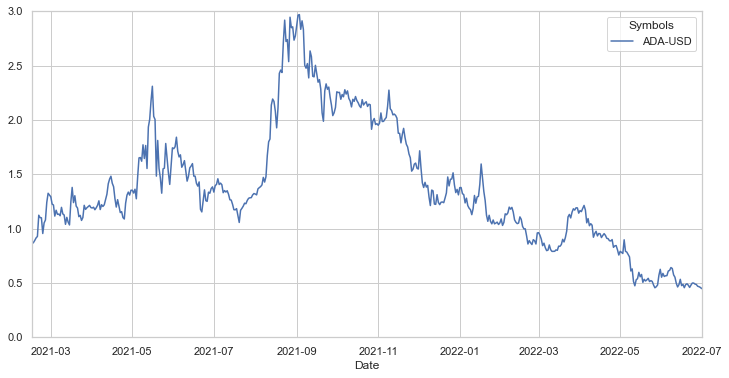

In [98]:
scatter= sns.lineplot(data=df.Close)
scatter.set_xlim(pd.Timestamp('2021-02-15'), pd.Timestamp('2022-07-01'));
scatter.set_ylim(bottom=0, top=3);

In [99]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [100]:
# the following makes 2 graphs that show the volume moved per day vs the price of the coin

In [204]:
fig = px.bar(df.Volume)
fig2 = px.scatter(df.Close)
fig.show()
fig2.show()

# Extracting the News for Crypto

NEWS API provides access to articles published from any given subject by the most established news sources in the world, we can use this API to find articles of any given subject and date.

## Import the required library

In [16]:
import pandas as pd
from newsapi import NewsApiClient
import dotenv
import os


## Loading our API key 

with the use of a ".env" file we avoid diclosing our credentials

In [ ]:
dotenv.load_dotenv()

pass_w=os.getenv("news_api_key")
newsapi = NewsApiClient(api_key=pass_w)

## Extracting information from the NEWS API

for this process the developer API onl;y allows us to use a specific range of time.

we can follow the " News API" instruction to extract information at:

"https://newsapi.org/docs/client-libraries/python"


To begin we can identify the diferent filtering criterias from the API that we are going to use. in this case the API requires a source of news from where to extract the articles and the date and range.  

In [20]:
sources = newsapi.get_sources()

In [47]:
sources["sources"][1]

{'id': 'abc-news-au',
 'name': 'ABC News (AU)',
 'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.",
 'url': 'http://www.abc.net.au/news',
 'category': 'general',
 'language': 'en',
 'country': 'au'}

In [49]:
sourcelist=[]
for i in range(0,len(sources["sources"])):
    temp = sources["sources"][i]["id"]
    sourcelist.append(temp)
print(sourcelist)

['abc-news', 'abc-news-au', 'aftenposten', 'al-jazeera-english', 'ansa', 'argaam', 'ars-technica', 'ary-news', 'associated-press', 'australian-financial-review', 'axios', 'bbc-news', 'bbc-sport', 'bild', 'blasting-news-br', 'bleacher-report', 'bloomberg', 'breitbart-news', 'business-insider', 'business-insider-uk', 'buzzfeed', 'cbc-news', 'cbs-news', 'cnn', 'cnn-es', 'crypto-coins-news', 'der-tagesspiegel', 'die-zeit', 'el-mundo', 'engadget', 'entertainment-weekly', 'espn', 'espn-cric-info', 'financial-post', 'focus', 'football-italia', 'fortune', 'four-four-two', 'fox-news', 'fox-sports', 'globo', 'google-news', 'google-news-ar', 'google-news-au', 'google-news-br', 'google-news-ca', 'google-news-fr', 'google-news-in', 'google-news-is', 'google-news-it', 'google-news-ru', 'google-news-sa', 'google-news-uk', 'goteborgs-posten', 'gruenderszene', 'hacker-news', 'handelsblatt', 'ign', 'il-sole-24-ore', 'independent', 'infobae', 'info-money', 'la-gaceta', 'la-nacion', 'la-repubblica', 'le-m

Using the sources option we can now check what articles are available from a specific source. 

In [80]:
source = "time"
date = "2022-07-30"
date2 = "2022-08-27"
q = "bitcoin"

all_articles = newsapi.get_everything(q=q,
                                      sources=source,
                                      from_param=date,
                                      to=date2,
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [83]:
all_articles["articles"][0]

{'source': {'id': 'time', 'name': 'Time'},
 'author': 'Andrew R. Chow',
 'title': 'A New U.S. Crackdown Has Crypto Users Worried About Their Privacy',
 'description': "The U.S. Treasury's decision to crack down on the crypto service was met with a huge backlash, and could lead to litigation.",
 'url': 'https://time.com/6205143/tornado-cash-us-crypto-ban/',
 'urlToImage': 'https://api.time.com/wp-content/uploads/2022/08/GettyImages-1306710030.jpg?quality=85&w=1200&h=628&crop=1',
 'publishedAt': '2022-08-10T19:47:00Z',
 'content': 'The battle between the crypto community and the U.S. government over financial privacy just escalated dramatically, amid government efforts to crack down on criminals. \r\nTornado Cash is a service tha… [+10203 chars]'}

In [84]:
pd.DataFrame(all_articles["articles"])

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'time', 'name': 'Time'}",Andrew R. Chow,A New U.S. Crackdown Has Crypto Users Worried ...,The U.S. Treasury's decision to crack down on ...,https://time.com/6205143/tornado-cash-us-crypt...,https://api.time.com/wp-content/uploads/2022/0...,2022-08-10T19:47:00Z,The battle between the crypto community and th...
1,"{'id': 'time', 'name': 'Time'}","Billy Perrigo/Washington, Andrew R. Chow and V...",The Twitter Whistleblower Needs You to Trust Him,An exclusive interview with Twitter whistleblo...,https://time.com/6208696/twitter-whistleblower...,https://api.time.com/wp-content/uploads/2022/0...,2022-08-25T21:38:09Z,"Peiter Zatko, the Twitter whistle-blower, is a..."
2,"{'id': 'time', 'name': 'Time'}",Andrew R. Chow,Twitter Whistleblower Alleges Deception: Alleg...,"Twitter's former head of security, Peiter “Mud...",https://time.com/6207996/twitter-whistleblower...,https://api.time.com/wp-content/uploads/2022/0...,2022-08-23T11:13:18Z,Twitter’s former top security official has all...


## Filtering on what to Extract:

from the 1st call we check on 1 of the articles we got to see the information that we extract.

the columns with usefull informarion are the following ones.
 - author
 - title
 - description
 - publishedAt <- the date can be of uste to locate it in the time series and mark it. 
 - URL <- Url for the article
 - urltoimage <- Image that we can display for the article
 - content < - might not need since the text is so long and we can go to the web page.
 - source <- this identifies who the publisher was
 
 note: since there is so many sources, ill select a top 3 of the most trustworthy sources and get the 3 most relevant articles form every stablishment to display in the last week. 